### QUESTION
Is the salary dependent on the programming language learned?
Which programming language is the most and least learned?

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from functions import create_mean_and_count_plot

df = pd.read_csv('./data/survey_results_public.csv')
df.head()

,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,...,StackOverflowMakeMoney,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary
0,1,Student,"Yes, both",United States,No,"Not employed, and not looking for work",Secondary school,NaN,NaN,NaN,...,Strongly disagree,Male,High school,White or of European descent,Strongly disagree,Strongly agree,Disagree,Strongly agree,NaN,NaN
1,2,Student,"Yes, both",United Kingdom,"Yes, full-time",Employed part-time,Some college/university study without earning ...,Computer science or software engineering,"More than half, but not all, the time",20 to 99 employees,...,Strongly disagree,Male,A master's degree,White or of European descent,Somewhat agree,Somewhat agree,Disagree,Strongly agree,NaN,37500.0
2,3,Professional developer,"Yes, both",United Kingdom,No,Employed full-time,Bachelor's degree,Computer science or software engineering,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A professional degree,White or of European descent,Somewhat agree,Agree,Disagree,Agree,113750.0,NaN
3,4,Professional non-developer who sometimes write...,"Yes, both",United States,No,Employed full-time,Doctoral degree,A non-computer-focused engineering discipline,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A doctoral degree,White or of European descent,Agree,Agree,Somewhat agree,Strongly agree,NaN,NaN
4,5,Professional developer,"Yes, I program as a hobby",Switzerland,No,Employed full-time,Master's degree,Computer science or software engineering,Never,10 to 19 employees,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**1.**  Selected only necessary columns and drop the NaN-values

In [2]:
language_df = df[['HaveWorkedLanguage', 'Salary']].dropna()
language_df

,HaveWorkedLanguage,Salary
2,Java; PHP; Python,113750.000000
14,Assembly; C; C++,100000.000000
17,C; Clojure; JavaScript; Matlab; Rust; SQL; Swift,130000.000000
22,Java,100764.000000
25,Java; Scala,175000.000000
...,...,...
51371,Go; JavaScript; Python,74193.548387
51378,JavaScript; Objective-C; Python; Swift,107526.881720
51382,C#; JavaScript; TypeScript,32258.064516
51387,C#; JavaScript; Python; SQL; VB.NET; VBA,58000.000000


**2.** Split the HaveWorkedLanguage-column by ';' and stack its values

In [3]:
s = language_df['HaveWorkedLanguage'].str.split('; ').apply(pd.Series, 1).stack()
s.index = s.index.droplevel(-1) # to line up with df's index
s.name = 'HaveWorkedLanguage' # needs a name to join
del language_df['HaveWorkedLanguage']
merged_df = language_df.join(s)

**3.** Lets have a look at the new dataframe

In [4]:
merged_df

,Salary,HaveWorkedLanguage
2,113750.0,Java
2,113750.0,PHP
2,113750.0,Python
14,100000.0,Assembly
14,100000.0,C
...,...,...
51387,58000.0,VB.NET
51387,58000.0,VBA
51390,40000.0,JavaScript
51390,40000.0,PHP


**4.** The total average of all available salaries

In [5]:
# show the average salary in total
merged_df['Salary'].mean()

57503.67149241554

**5.** Show all calculated average salaries and sort them in descending order

In [6]:
merged_df.groupby('HaveWorkedLanguage')['Salary'].mean().reset_index(name='mean').sort_values(['mean'], ascending=False)

,HaveWorkedLanguage,mean
4,Clojure,77494.043705
29,Smalltalk,76455.226730
26,Rust,73091.621163
11,Go,71962.086934
13,Hack,71212.729056
22,Perl,70462.518553
10,F#,69717.472684
28,Scala,68600.946263
9,Erlang,67908.272204
12,Groovy,65709.950021


**6.** Count all calculated average salaries and sort them in descending order

In [7]:
merged_df.groupby('HaveWorkedLanguage')['Salary'].count().reset_index(name='count').sort_values(['count'], ascending=False)

,HaveWorkedLanguage,count
16,JavaScript,8132
27,SQL,6512
2,C#,4597
15,Java,4572
23,Python,3442
21,PHP,3082
3,C++,2166
1,C,1684
31,TypeScript,1381
25,Ruby,1249


**7.** Show a plot with the dataframe as a basis

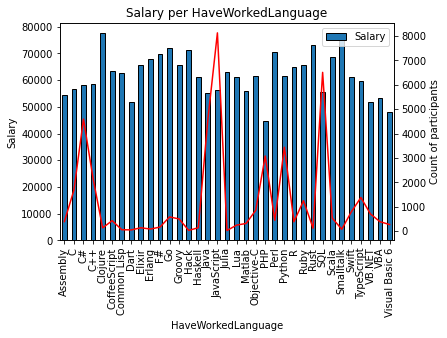

In [8]:
plt = create_mean_and_count_plot(merged_df, ['HaveWorkedLanguage'], 'Salary', 'Count of participants', 'Salary per HaveWorkedLanguage')
plt.show()

### Answer
The ones who have learned Clojure do have the highest average salary (at **~77,494.04**), 
while people who learned PHP do have the lowest salary (at **~44,780.66**).
Which means there is a gap of **~33,000**.

This means that the salary is acutally dependent from the learned programming language.
As seen in the last list, the most learned language is Javascript, while the least learned is Julia.
It is interesting to see that the average salary for these 
two languages (Javascript: **56,396.92**, Julia: **~62,989.14**) does however look different.
I assume this is because Julia is a language which is known by less people 
and therefore the salary is above the total average of all languages (at **~57,503.67**).